# Exploratory Data Analysis on Retail
# Data Science Intern at Sparks Foundation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


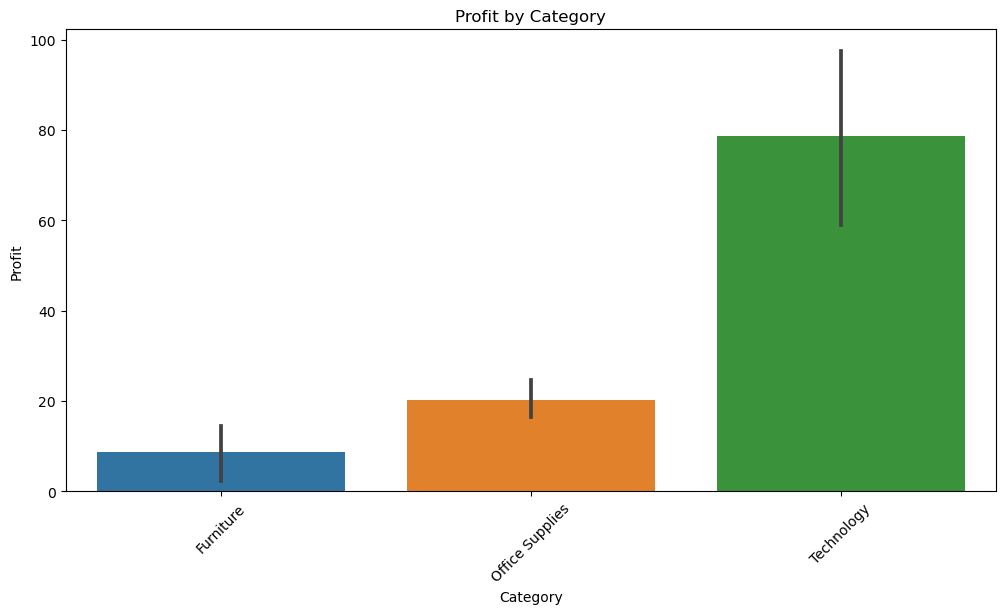

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Category", y="Profit", data=data)
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

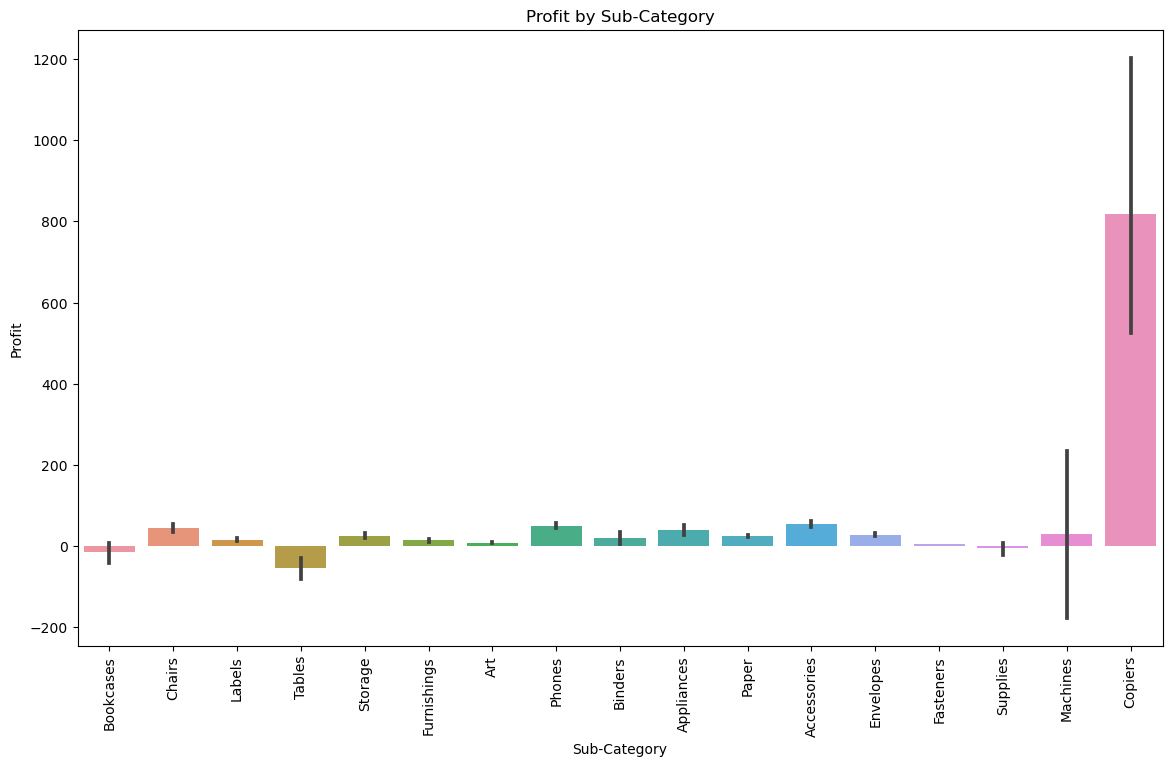

In [8]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Sub-Category", y="Profit", data=data)
plt.title("Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

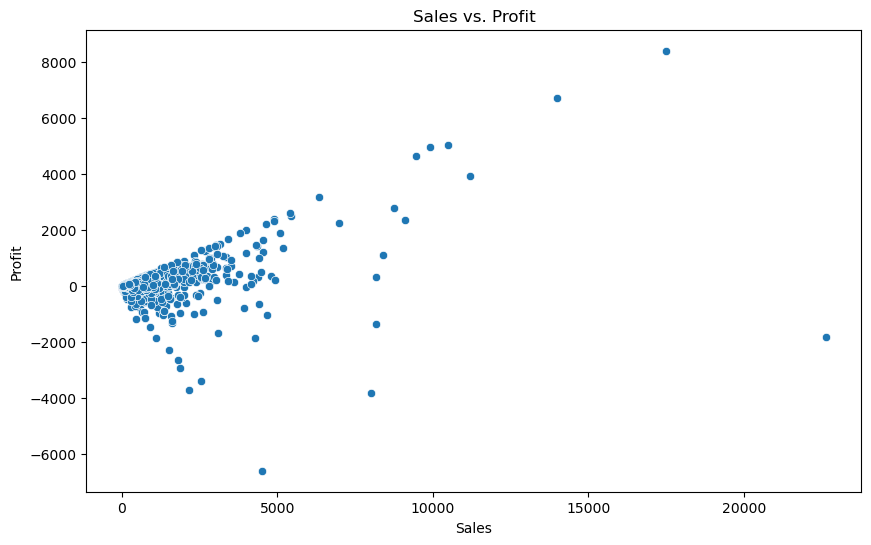

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sales", y="Profit", data=data)
plt.title("Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

In [10]:
correlation = data["Sales"].corr(data["Profit"])
print("===== Summary: Sales vs. Profit =====")
print(f"Correlation coefficient: {correlation:.2f}")

===== Summary: Sales vs. Profit =====
Correlation coefficient: 0.48


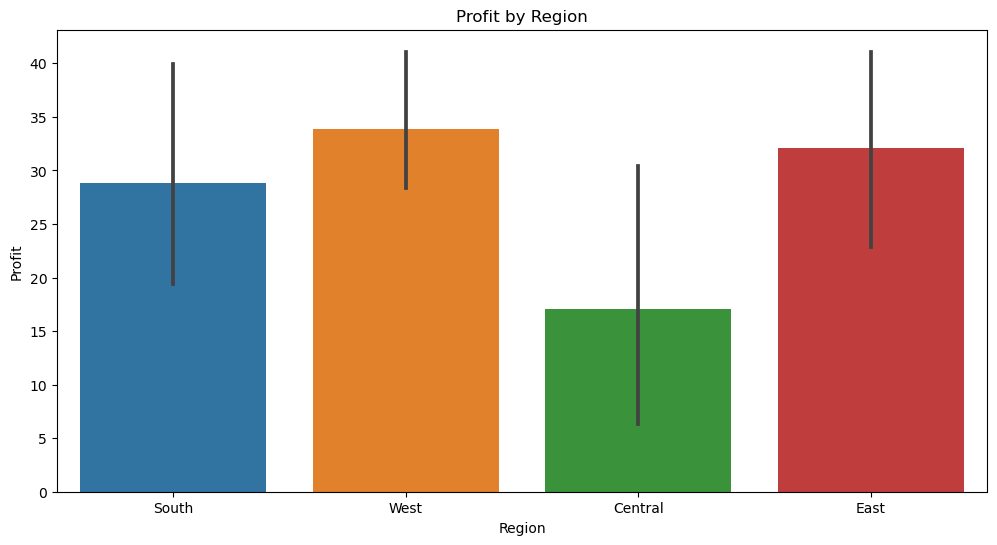

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="Profit", data=data)
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

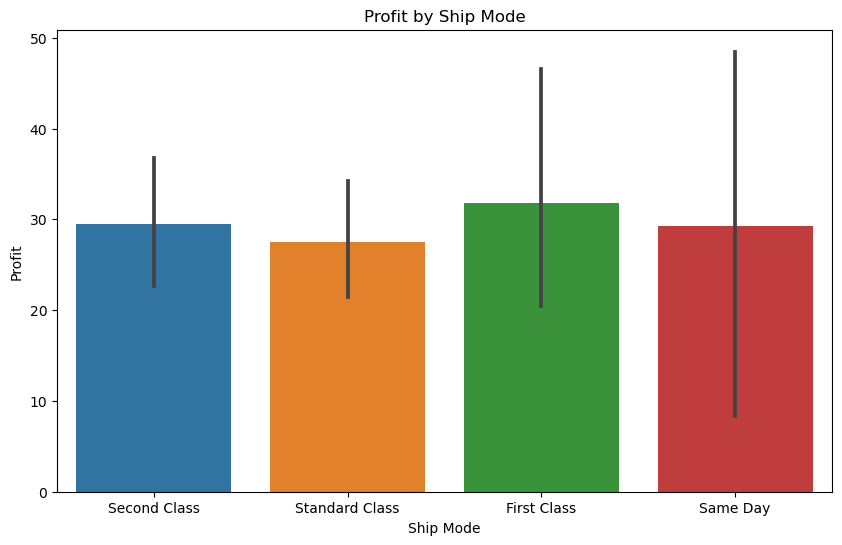

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Ship Mode", y="Profit", data=data)
plt.title("Profit by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()

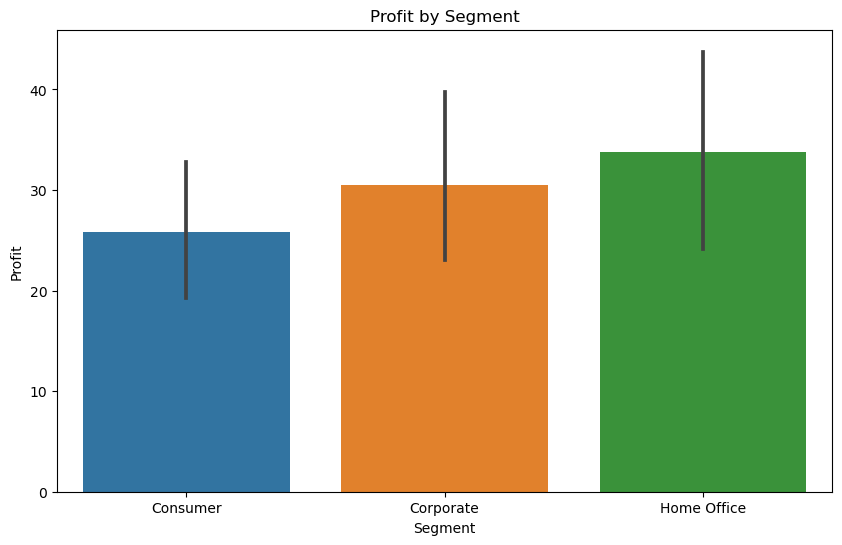

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Segment", y="Profit", data=data)
plt.title("Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

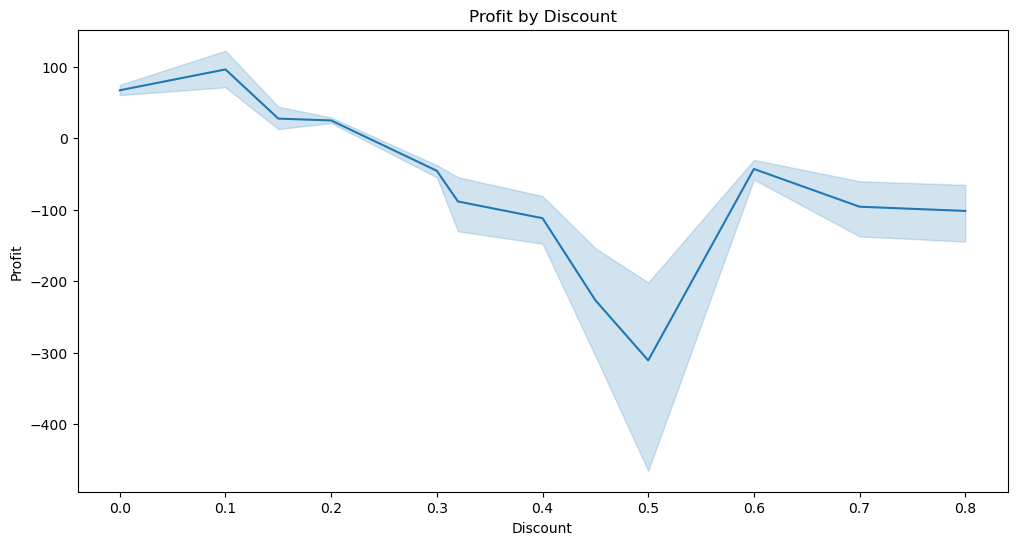

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Discount", y="Profit", data=data)
plt.title("Profit by Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

In [15]:
avg_profit = data.groupby("Discount")["Profit"].mean()
max_discount = avg_profit.idxmax()
min_discount = avg_profit.idxmin()

print("===== Summary: Profit by Discount =====")
print(f"Maximum Average Profit at {max_discount} discount level")
print(f"Minimum Average Profit at {min_discount} discount level")

===== Summary: Profit by Discount =====
Maximum Average Profit at 0.1 discount level
Minimum Average Profit at 0.5 discount level


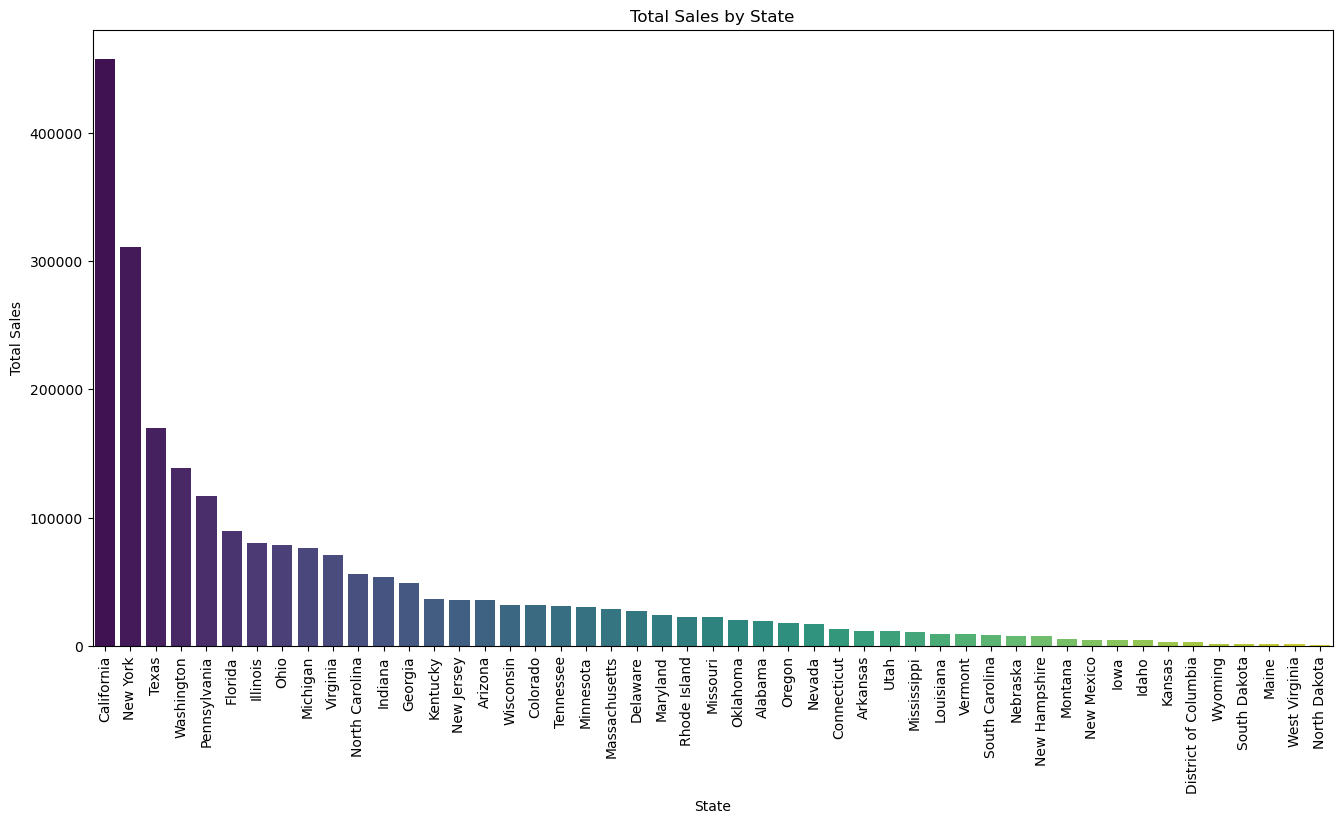

In [16]:
state_sales_profit = data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(x=state_sales_profit.index, y=state_sales_profit["Sales"], data=state_sales_profit, palette="viridis")
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

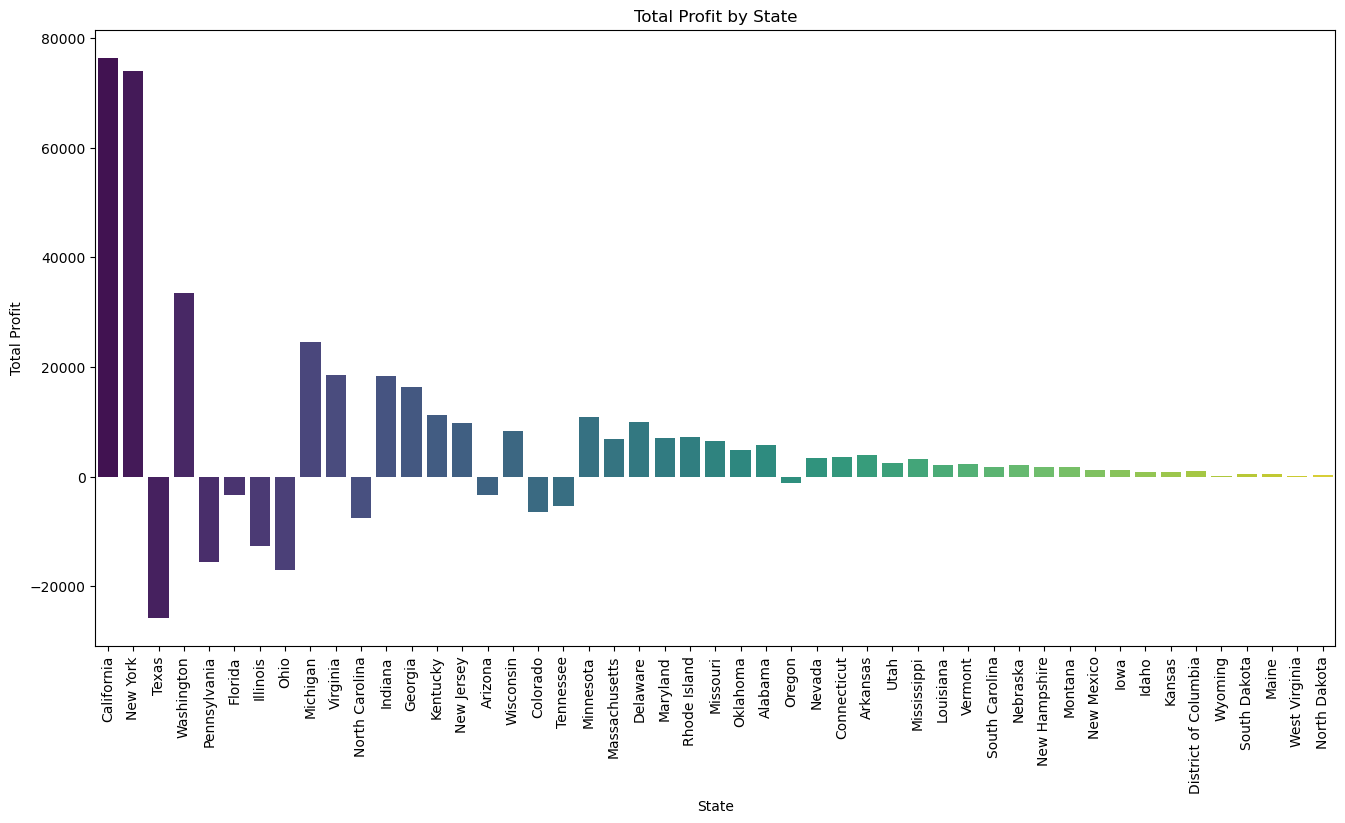

In [17]:
plt.figure(figsize=(16, 8))
sns.barplot(x=state_sales_profit.index, y=state_sales_profit["Profit"], data=state_sales_profit, palette="viridis")
plt.title("Total Profit by State")
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.xticks(rotation=90)
plt.show()